In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np

In [2]:
"""Dataset Info"""

"""
Name of dataset: 2023-2024 NBA Player Stats - Regular

Dataset link: https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats/data

Dataset download: https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats?resource=download&select=2023-2024+NBA+Player+Stats+-+Regular.csv

License: Attribution 4.0 International(CC BY 4.0 DEED). Canonical URL  https://creativecommons.org/licenses/by/4.0/

Size: 2023-2024 NBA Player Stats - Regular.csv is 93.1 KB

"""

'\nName of dataset: 2023-2024 NBA Player Stats - Regular\n\nDataset link: https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats/data\n\nDataset download: https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats?resource=download&select=2023-2024+NBA+Player+Stats+-+Regular.csv\n\nLicense: Attribution 4.0 International(CC BY 4.0 DEED). Canonical URL  https://creativecommons.org/licenses/by/4.0/\n\nSize: 2023-2024 NBA Player Stats - Regular.csv is 93.1 KB\n\n'

In [3]:
"""
Characteristics of this dataset:

This data set contains various data on all NBA players in the 2023-2024 NBA regular season. The player data it contains includes Player's name, Position, Player's age, Player's
  Team, Games played, Games started, Minutes played per game, various shooting data, shooting efficiency, rebound data, steal data and block data, etc. This is everything in the header of the data table and what it means:

Rk: Rank
Player : Player's name
Pos: Position
Age: Player's age
Tm:Team
G : Games played
GS: Games started
MP: Minutes played per game
FG: Field goals per game
FGA: Field goal attempts per game
FG%: Field goal percentage
3P: 3-point field goals per game
3PA: 3-point field goal attempts per game
3P%: 3-point field goal percentage
2P: 2-point field goals per game
2PA: 2-point field goal attempts per game
2P%: 2-point field goal percentage
eFG% : Effective field goal percentage
FT: Free throws per game
FTA: Free throw attempts per game
FT%: Free throw percentage
ORB: Offensive rebounds per game
DRB: Defensive rebounds per game
TRB : Total rebounds per game
AST: Assists per game
STL: Steals per game
BLK : Blocks per game
TOV: Turnovers per game
PF : Personal fouls per game
PTS: Points per game

The data set records a total of 735 pieces of data. It should be noted that some players will change teams during the season. Therefore, a player will have multiple pieces of data on different teams at the same time.
"""

"\nCharacteristics of this dataset:\n\nThis data set contains various data on all NBA players in the 2023-2024 NBA regular season. The player data it contains includes Player's name, Position, Player's age, Player's\n  Team, Games played, Games started, Minutes played per game, various shooting data, shooting efficiency, rebound data, steal data and block data, etc. This is everything in the header of the data table and what it means:\n\nRk: Rank\nPlayer : Player's name\nPos: Position\nAge: Player's age\nTm:Team\nG : Games played\nGS: Games started\nMP: Minutes played per game\nFG: Field goals per game\nFGA: Field goal attempts per game\nFG%: Field goal percentage\n3P: 3-point field goals per game\n3PA: 3-point field goal attempts per game\n3P%: 3-point field goal percentage\n2P: 2-point field goals per game\n2PA: 2-point field goal attempts per game\n2P%: 2-point field goal percentage\neFG% : Effective field goal percentage\nFT: Free throws per game\nFTA: Free throw attempts per game\

In [4]:
# Try loading the data with a different encoding, commonly 'ISO-8859-1' for CSV files with non-standard characters
data_iso = pd.read_csv("data/2023-2024 NBA Player Stats - Regular.csv", delimiter=";", encoding='ISO-8859-1')

# Display the first few rows of the dataframe
data_iso.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


Contour plots are now displayed using simplified positional categories (Guard, Forward, Center), which gives you a clearer picture of where players in these positional categories fare in terms of Effective Field Goal Percentage (eFG%) and Points Per Game (PTS) The change.

C:\Users\caoji\AppData\Local\Temp\ipykernel_12168\2757723437.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_efg_pts.dropna(subset=['PTS', 'eFG%'], inplace=True)
C:\Users\caoji\AppData\Local\Temp\ipykernel_12168\2757723437.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_efg_pts['Pos'] = data_efg_pts['Pos'].replace({
C:\Users\caoji\AppData\Local\Temp\ipykernel_12168\2757723437.py:17: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data_efg_pts, x='PTS

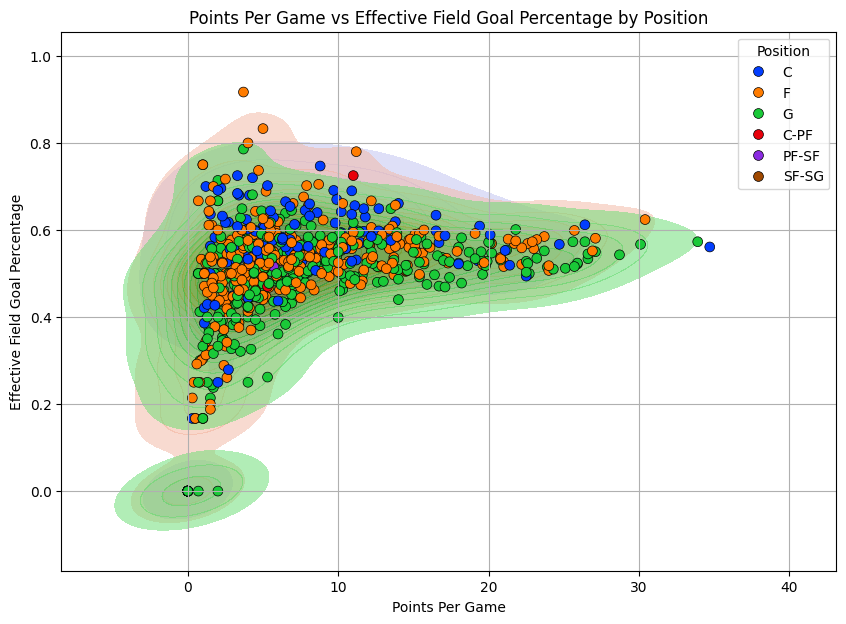

In [10]:
# Filter columns for the analysis
data_efg_pts = data_iso[['Pos', 'PTS', 'eFG%']]

# Drop any rows with missing data in these specific columns
data_efg_pts.dropna(subset=['PTS', 'eFG%'], inplace=True)

# Simplify the position categories to Guards (G), Forwards (F), and Centers (C)
data_efg_pts['Pos'] = data_efg_pts['Pos'].replace({
    'PG': 'G', 'SG': 'G', 'G': 'G',
    'SF': 'F', 'PF': 'F', 'F': 'F',
    'C': 'C', 'PF-C': 'C', 'SF-PF': 'F', 'SG-SF': 'G', 'SG-PG': 'G', 'PG-SG': 'G'
})

plt.figure(figsize=(10, 7))
sns.kdeplot(data=data_efg_pts, x='PTS', y='eFG%', hue='Pos', fill=True, palette='bright', levels=15, alpha=0.5)
sns.scatterplot(data=data_efg_pts, x='PTS', y='eFG%', hue='Pos', palette='bright', s=50, edgecolor='black', linewidth=0.5)
plt.title('Points Per Game vs Effective Field Goal Percentage by Position')
plt.xlabel('Points Per Game')
plt.ylabel('Effective Field Goal Percentage')
plt.grid(True)
plt.legend(title='Position')
plt.show()

For a more advanced and peer-focused visualization, let's delve deeper into the data by combining both the assist-to-turnover ratio and field goal percentage in a multi-dimensional plot that could be of interest to analysts or professionals in sports data analysis.

a scatter plot where:

The x-axis represents the Assist-to-Turnover Ratio.
The y-axis represents the Field Goal Percentage.
The size of each point is proportional to the average points per game, adding a layer of understanding regarding the player's scoring impact.
Color differentiation by player position to analyze positional trends.

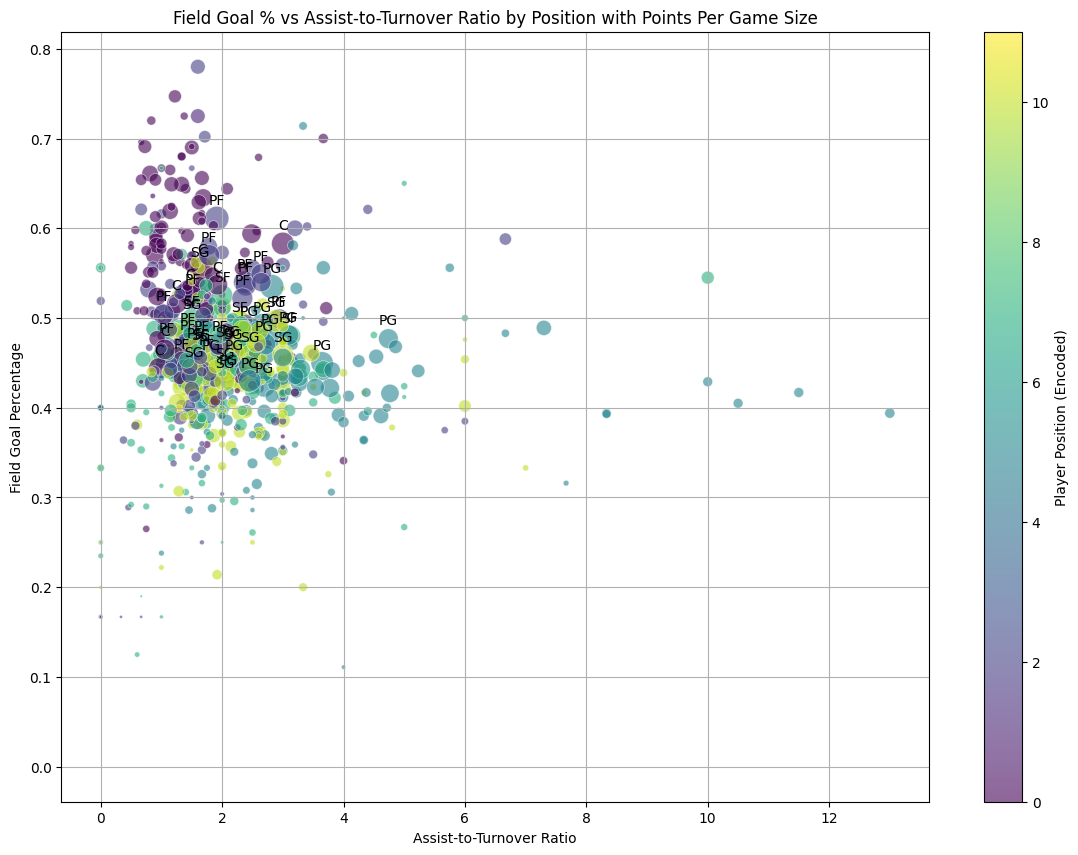

In [17]:
# Filter the necessary columns for the advanced visualization
data_advanced = data_iso[['Pos', 'FG%', 'AST/TO', 'PTS']].dropna(subset=['FG%', 'AST/TO'])

# Define the size of the points based on points per game, scaled for better visualization
size = data_advanced['PTS'] * 10

# Create the scatter plot
plt.figure(figsize=(14, 10))
scatter = plt.scatter(data_advanced['AST/TO'], data_advanced['FG%'], s=size, c=pd.Categorical(data_advanced['Pos']).codes, cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.colorbar(scatter, label='Player Position (Encoded)')
plt.xlabel('Assist-to-Turnover Ratio')
plt.ylabel('Field Goal Percentage')
plt.title('Field Goal % vs Assist-to-Turnover Ratio by Position with Points Per Game Size')
plt.grid(True)

# Add annotations for certain standout players (optional)
standout_players = data_advanced[data_advanced['PTS'] > 20]  # Example threshold
for _, row in standout_players.iterrows():
    plt.annotate(row['Pos'], (row['AST/TO'], row['FG%']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

visualization showing points per game versus age for NBA players, with a density shading to indicate the concentration of data points. In this plot, if present, LeBron James is highlighted in red to stand out from the others, serving as a specific reference point or outlier. LeBron James is crazy. LeBron James is highlighted in red to stand out from the others, serving as a specific reference point or outlier.

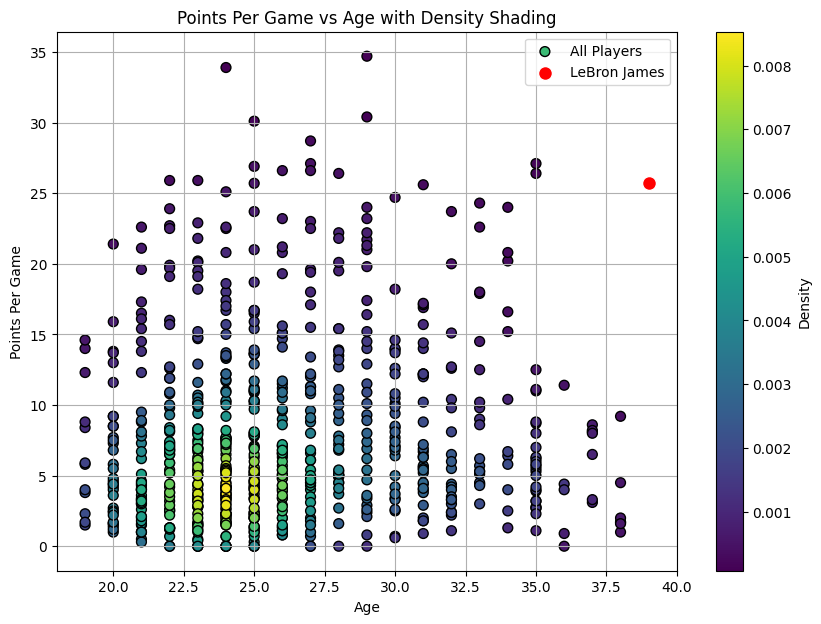

In [15]:
# Checking if LeBron James is in the dataset and then plotting
lebron_stats = data_iso[data_iso['Player'] == 'LeBron James'][['PTS', 'Age']]

# Prepare data for density calculation
x = data_iso['Age']
y = data_iso['PTS']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Recalculate the density for proper shading
z = gaussian_kde(xy)(xy)

# Create the plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(x, y, c=z, s=50, cmap='viridis', edgecolor='k', label='All Players')
plt.colorbar(label='Density')

# Highlight LeBron James if present
if not lebron_stats.empty:
    plt.scatter(lebron_stats['Age'], lebron_stats['PTS'], color='red', s=100, edgecolor='white', label='LeBron James')

plt.xlabel('Age')
plt.ylabel('Points Per Game')
plt.title('Points Per Game vs Age with Density Shading')
plt.legend()
plt.grid(True)
plt.show()

Check the player's assist-to-turnover ratio (assists/turnovers) for each position. We will plot box plots of field goal percentage by player position. The box plot above displays the field goal percentage by player position for the 2023-2024 NBA season. Each box plot segment shows the distribution of field goal percentages across different player positions, helping to visualize where players typically range in shooting efficiency based on their role on the court.

C:\Users\caoji\AppData\Local\Temp\ipykernel_12168\3466821573.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pos', y='FG%', data=data_position_fg, palette='Set3')


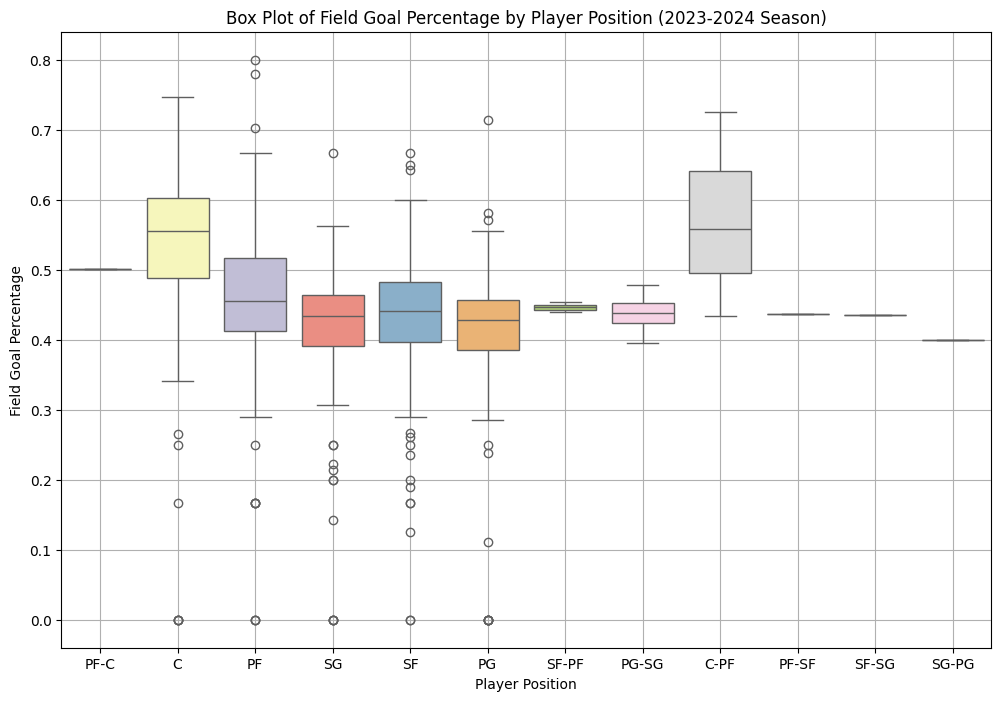

In [16]:
# Calculate assist-to-turnover ratio and add it to the dataset
data_iso['AST/TO'] = data_iso['AST'] / data_iso['TOV'].replace({0: np.nan})  # Avoid division by zero by replacing 0 with NaN

# Filter the necessary columns for box plot analysis
data_position_fg = data_iso[['Pos', 'FG%']]

# Create box plots for Field Goal Percentage by Player Position
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pos', y='FG%', data=data_position_fg, palette='Set3')
plt.title('Box Plot of Field Goal Percentage by Player Position (2023-2024 Season)')
plt.xlabel('Player Position')
plt.ylabel('Field Goal Percentage')
plt.grid(True)
plt.show()